# 目的
了解常用图片格式和OpenCV高质量保存图片的方式，学习如何使用Matplotlib显示OpenCV图像。

## 无损保存
事实上，我们日常看到的大部分图片都是压缩过的，那么都有哪些常见的图片格式呢？

## 常用图片格式
- bmp
 - 全称：Bitmap
 - 不压缩
- jpg
 - 全称：Joint Photographic Experts Group
 - 有损压缩方式
- png
 - 全称：Portable Network Graphics
 - 无损压缩方式
 
简单来说，同一个文件保存成不同的格式后，文件大小上bmp肯定是最大的，而png和jpg，不同的压缩比结果会有所不同。可以用画图工具新建一副100×100的图像，分别保存成这三种格式来验证：

## 高质量保存
用cv2.imwrite()保存图片时，可以传入第三个参数（请参考接口文档），用于控制保存质量：
- cv2.IMWRITE_JPEG_QUALITY：jpg质量控制，取值0~100，值越大，质量越好，默认为95
- cv2.IMWRITE_PNG_COMPRESSION：png质量控制，取值0~9，值越大，压缩比越高，默认为1

还有诸如CV_IMWRITE_WEBP_QUALITY的参量，不常用，请参考：ImwriteFlags。

举例来说，原图lena.jpg的分辨率是350×350，大小49.7KB。我们把它转成不同格式看下：

In [1]:
import cv2
new_img = cv2.imread('lena.jpg')

# bmp
cv2.imwrite('img_bmp.bmp',new_img) # 文件大小：359KB

# jpg 默认95%质量
cv2.imwrite('img_jpg95.jpg',new_img) # 文件大小：52.3KB
# jpg 20%质量
cv2.imwrite('img_jpg20.jpg',new_img,[int(cv2.IMWRITE_JPEG_QUALITY),20]) # 文件大小：8.01KB
# jpg 100%质量
cv2.imwrite('img_jpg100.jpg',new_img,[int(cv2.IMWRITE_JPEG_QUALITY),100]) # 文件大小：82.5KB

# png 默认1压缩比
cv2.imwrite('img_png1.png',new_img) # 文件大小：240KB
# png 9压缩比
cv2.imwrite('img_png9.png',new_img,[int(cv2.IMWRITE_PNG_COMPRESSION),9]) # 文件大小：207KB

True

可以看到：
- bmp文件是最大的，没有任何压缩（1个像素点1byte，3通道的彩色图总大小：350×350×3/1024 ≈ 359 KB）
- jpg/png本身就有压缩的，所以就算是100%的质量保存，体积也比bmp小很多
- jpg的容量优势很明显，这也是它为什么如此流行的原因

思考：为什么原图49.7KB，保存成bmp或其他格式反而大了呢？

这是个很有趣的问题，很多童鞋都问过我。这里需要明确的是保存新格式时，容量大小跟原图的容量没有直接关系，而是取决于原图的分辨率大小和原图本身的内容（压缩方式），所以lena.jpg保存成不压缩的bmp格式时，容量大小就是固定的350×350×3/1024 ≈ 359 KB；另外，容量变大不代表画质提升噢，不然就逆天了~

## Matplotlib
Matplotlib是Python的一个很常用的绘图库，有兴趣的可以去官网学习更多内容。

## 显示灰度图

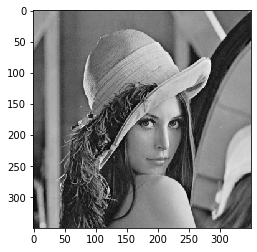

In [6]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lena.jpg', 0)

# 灰度图显示，cmap(color map)设置为gray
plt.imshow(img, cmap='gray')
plt.show()

## 显示彩色图
OpenCV中的图像是以BGR的通道顺序存储的，但Matplotlib是以RGB模式显示的，所以直接在Matplotlib中显示OpenCV图像会出现问题，因此需要转换一下:

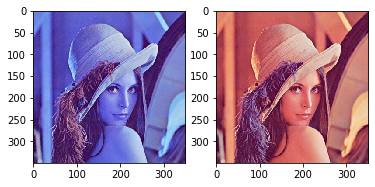

In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lena.jpg')

img2 = img[:, :, ::-1]
# 或使用
# img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 显示不正确的图
plt.subplot(121),plt.imshow(img)
# 显示正确的图
plt.subplot(122)
# plt.xticks([]),plt.yticks([])
plt.imshow(img2)

plt.show()

img[:,:,0]表示图片的蓝色通道，img[:,:,::-1]就表示BGR翻转，变成RGB，说明一下：

熟悉Python的童鞋应该知道，对一个字符串s翻转可以这样写：s[::-1]，’abc’变成’cba’，-1表示逆序。图片是二维的，所以完整地复制一副图像就是：
```
img2 = img[:,:] # 写全就是：img2 = img[0:height,0:width]
```
而图片是有三个通道，相当于一个长度为3的字符串，所以通道翻转与图片复制组合起来便是img[:,:,::-1]。

## 加载和保存图片
不使用OpenCV，Matplotlib也可以加载和保存图片：

In [11]:
import matplotlib.image as pli

img = pli.imread('lena.jpg')
plt.imshow(img)

# 保存图片，需放在show()函数之前
plt.savefig('lena2.jpg')
plt.show()


ValueError: Only know how to handle extensions: ['png']; with Pillow installed matplotlib can handle more images